# 鳶尾花(Iris)品種的辨識

## 載入相關套件

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. 載入資料集

In [34]:
ds = datasets.load_iris()

## 2. 資料清理、資料探索與分析

In [35]:
# 資料集說明
print(ds.DESCR) # dataset（非 DataFrame）description 大寫指令

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)    # 轉換成DataFrame格式
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
# 觀察資料集彙總資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [40]:
# 描述統計量
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


<Axes: >

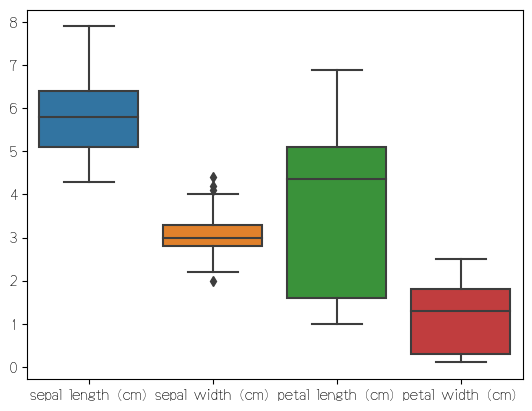

In [42]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=df)

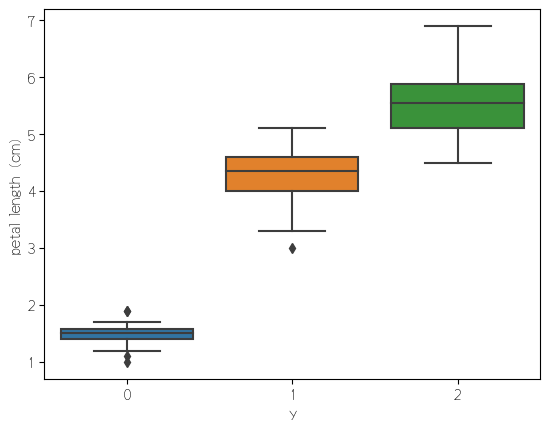

In [43]:
df2 = df.copy()
df2['y'] = y
sns.boxplot(x='y', y='petal length (cm)', data=df2);

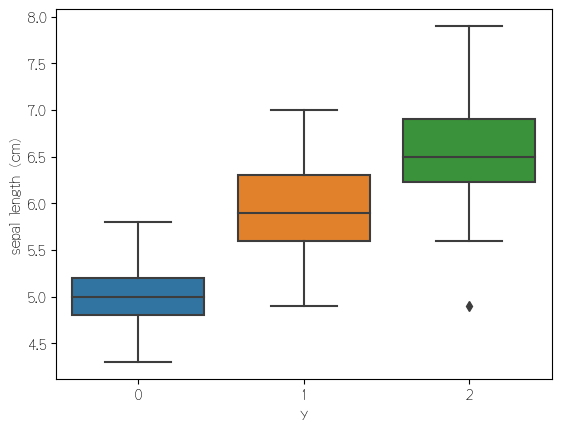

In [44]:
sns.boxplot(x='y', y='sepal length (cm)', data=df2);

In [45]:
# 是否有含遺失值(Missing value)
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [46]:
# 是否有含遺失值(Missing value)
df.isnull().sum().sum()

0

## 繪圖

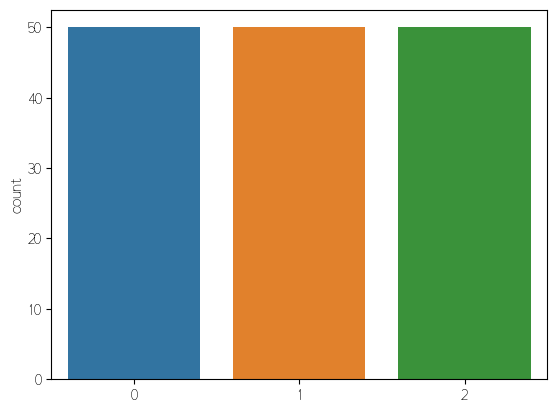

In [47]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y);

In [48]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

## 3. 不須進行特徵工程

In [49]:
df2['ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,ratio
0,5.1,3.5,1.4,0.2,0,1.457143
1,4.9,3.0,1.4,0.2,0,1.633333
2,4.7,3.2,1.3,0.2,0,1.468750
3,4.6,3.1,1.5,0.2,0,1.483871
4,5.0,3.6,1.4,0.2,0,1.388889
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233333
146,6.3,2.5,5.0,1.9,2,2.520000
147,6.5,3.0,5.2,2.0,2,2.166667
148,6.2,3.4,5.4,2.3,2,1.823529


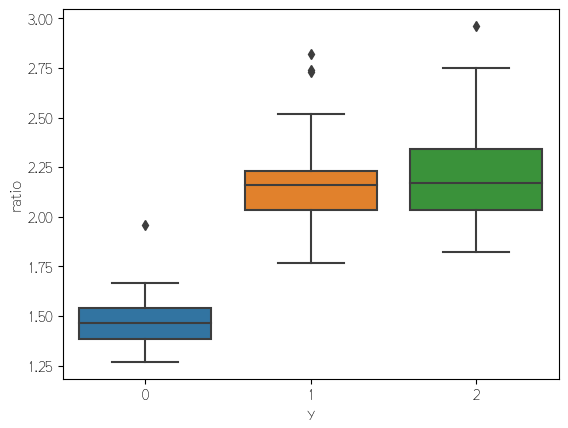

In [50]:
sns.boxplot(x='y', y='ratio', data=df2);

## 4. 資料分割

In [51]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [52]:
y_train

array([0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 1, 2, 0, 1, 1])

## 特徵縮放

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [54]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [55]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評估

In [56]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 1, 0, 2])

In [57]:
y_pred2 = clf.predict_proba(X_test_std) # 預測機率結果
y_pred2

array([[1.46368549e-01, 8.47242855e-01, 6.38859638e-03],
       [4.05789016e-02, 9.39342669e-01, 2.00784294e-02],
       [9.08974918e-01, 9.10237902e-02, 1.29186878e-06],
       [9.90522376e-01, 9.47758370e-03, 4.00576733e-08],
       [3.65271747e-03, 6.73922710e-01, 3.22424572e-01],
       [2.06956401e-02, 7.96141769e-01, 1.83162591e-01],
       [9.41755250e-02, 8.56422542e-01, 4.94019329e-02],
       [2.09055425e-02, 8.19554333e-01, 1.59540124e-01],
       [9.67678208e-01, 3.23215218e-02, 2.70443324e-07],
       [9.90189848e-01, 9.81007823e-03, 7.38982471e-08],
       [9.41867372e-02, 8.98345546e-01, 7.46771673e-03],
       [7.00599597e-04, 1.97355309e-01, 8.01944091e-01],
       [2.10383129e-02, 5.62176528e-01, 4.16785159e-01],
       [5.75396591e-02, 9.33399218e-01, 9.06112303e-03],
       [2.70654984e-05, 1.84698715e-02, 9.81503063e-01],
       [9.87327538e-01, 1.26723218e-02, 1.40503350e-07],
       [9.52866056e-01, 4.71335988e-02, 3.44754923e-07],
       [3.53378369e-02, 8.89204

In [58]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

96.67%


In [59]:
clf.score(X_test_std, y_test)

0.9666666666666667

In [60]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 10  0]
 [ 0  1  6]]


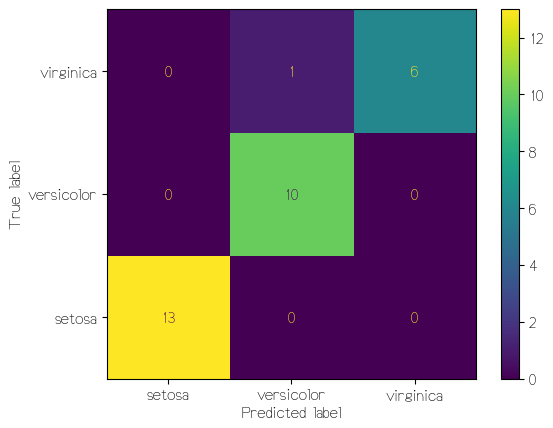

In [61]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

## 8. 模型評估，暫不進行

In [62]:
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(X_train_std, y_train)
clf2.score(X_test_std, y_test)

0.9666666666666667

## 9. 模型佈署

In [63]:
# 模型存檔
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib');

## 10.模型預測，請參見 01_05_iris_prediction.py